# ARIMA

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [4]:
female_birth_data = pd.read_csv("daily-total-female-births-CA.csv")

In [5]:
female_birth_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [6]:
birth_data = pd.read_csv("daily-total-female-births-CA.csv", index_col = [0], parse_dates = [0])

In [7]:
birth_data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
birth_data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

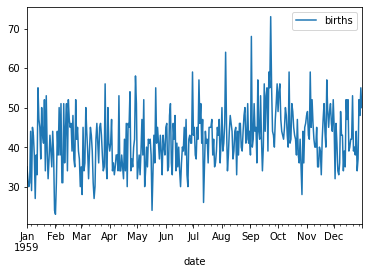

In [9]:
birth_data.plot()

In [10]:
# also called smoothing
moving_average_birth = birth_data.rolling(window = 10).mean() # window:- This is the number of observation used for calculating the statistuc

In [11]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,40.9
1959-12-28,42.1
1959-12-29,42.7


<AxesSubplot:xlabel='date'>

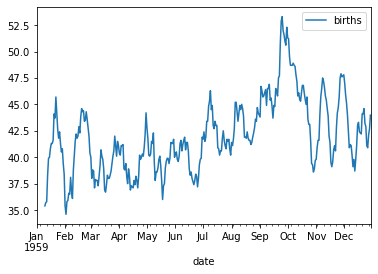

In [12]:
moving_average_birth.plot()

In [13]:
sm.stats.durbin_watson(birth_data)

array([0.04624491])

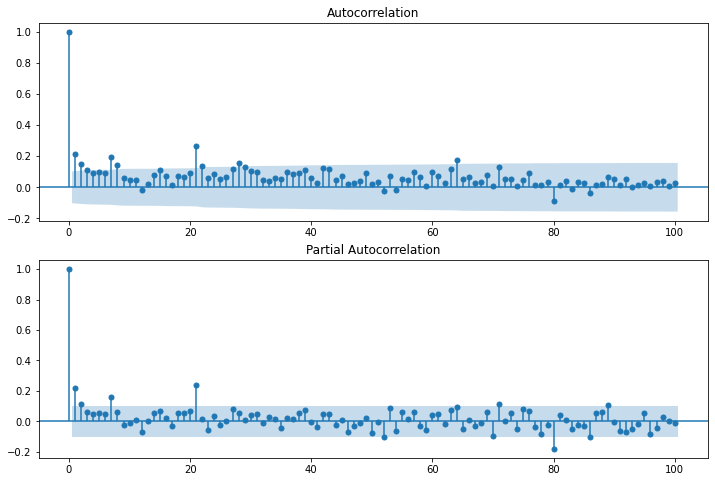

In [14]:
# Show plots in the notebook
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags = 100, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags = 100, ax = ax2)

In [15]:
training_data = birth_data[0:320]
test_data = birth_data[320:]

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
arima = ARIMA(training_data, order = (2,1,3))

C:\Users\DB0186AU\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\DB0186AU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency

In [20]:
model = arima.fit()

C:\Users\DB0186AU\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
model.aic

2164.7000264729263

In [22]:
pred = model.forecast(steps = 45)[0]

In [26]:
birth_data.tail(45)

,births
date,
1959-11-17,33
1959-11-18,42
1959-11-19,47
1959-11-20,51
1959-11-21,44
1959-11-22,40
1959-11-23,57
1959-11-24,49
1959-11-25,45


In [23]:
pred

array([43.11703155, 44.26269782, 43.64676159, 43.03636196, 44.0794523 ,
       43.9755521 , 43.10808036, 43.84696351, 44.19498008, 43.30164469,
       43.63322475, 44.28682814, 43.56566656, 43.49086008, 44.26310403,
       43.84234566, 43.44848537, 44.1584261 , 44.08085524, 43.50862903,
       44.01886615, 44.24700271, 43.65155773, 43.89021897, 44.32773057,
       43.84320439, 43.80829331, 44.33036209, 44.04482323, 43.79295448,
       44.2776317 , 44.22202625, 43.84655989, 44.20026374, 44.35137957,
       43.95638587, 44.1290908 , 44.42356281, 44.09986112, 44.08846761,
       44.4429934 , 44.25102243, 44.09216662, 44.42458722, 44.38661284])

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
np.sqrt(mean_squared_error(test_data, pred))

6.612977853788661